# **SpaceX  Falcon 9 First Stage Landing Prediction** 

## **Exploratory Data Analysis.**

### Objectives

Exploratory Data Analysis (EDA) and Feature Engineering will be performed using `Pandas` and `Matplotlib` to gain insights and prepare the data for predictive modeling.  

The following tasks will be conducted:  
- **Exploratory Data Analysis**  
- **Data Preparation and Feature Engineering**  

***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import spacex
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from spacex.config import RAW_DATA_DIR, INTERIM_DATA_DIR, PROCESSED_DATA_DIR, FIGURES_DIR

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)  

In [2]:
sns.set_style('white')
sns.set_palette('Set1')

## Exploratory Data Analysis


The SpaceX dataset will be read into a Pandas DataFrame, and a summary of the data will be displayed. The dataset will then be filtered to include only entries where the `Booster_Version` is 'Falcon 9'.  



In [3]:
#csv_file = os.path.join(INTERIM_DATA_DIR, 'dataset_part_2.csv')
#df = pd.read_csv(csv_file)

# OR

pickle_file = os.path.join(INTERIM_DATA_DIR, 'dataset_part_2.pkl')
df = pd.read_pickle(pickle_file)

df = df[df['Booster_Version']=='Falcon 9']
df.head(5)

,Date,Time (UTC),Booster_Version,Serial,Launch_Site,Facility,Complex,Longitude,Latitude,Payload,Payload_Mass,Customer,Orbit,Mission_Outcome,Launch_Outcome,Booster_Landing,Landing_Pad,Block,Flights,GridFins,Legs,Reused,Reused_Count,date_utc,Flight_Number,Class
0,2010-06-04,18:45:00,Falcon 9,B0003,CCSFS SLC-40,CCSFS,SLC-40,-80.577366,28.561857,Dragon Spacecraft Qualification Unit,6123.547647,SpaceX,LEO,None None,Success,Failure,NaN,1.0,1.0,False,False,False,0.0,2010-06-04 18:45:00+00:00,1,0
2,2012-05-22,07:44:00,Falcon 9,B0005,CCSFS SLC-40,CCSFS,SLC-40,-80.577366,28.561857,Dragon,525.000000,NASA(COTS),LEO,None None,Success,No attempt,NaN,1.0,1.0,False,False,False,0.0,2012-05-22 07:44:00+00:00,3,0
4,2013-03-01,15:10:00,Falcon 9,B0007,CCSFS SLC-40,CCSFS,SLC-40,-80.577366,28.561857,SpaceX CRS-2,677.000000,NASA (CRS),ISS,None None,Success,No attempt,NaN,1.0,1.0,False,False,False,0.0,2013-03-01 19:10:00+00:00,5,0
5,2013-09-29,16:00:00,Falcon 9,B1003,VAFB SLC-4E,VAFB,SLC-4E,-120.610829,34.632093,CASSIOPE,500.000000,MDA,PO,False Ocean,Success,Uncontrolled,NaN,1.0,1.0,False,False,False,0.0,2013-09-29 16:00:00+00:00,6,0
6,2013-12-03,22:41:00,Falcon 9,B1004,CCSFS SLC-40,CCSFS,SLC-40,-80.577366,28.561857,SES-8,3170.000000,SES,GTO,None None,Success,No attempt,NaN,1.0,1.0,False,False,False,0.0,2013-12-03 22:41:00+00:00,7,0


In [4]:
df.dtypes

Date                    datetime64[ns]
Time (UTC)                      object
Booster_Version                 object
Serial                          object
Launch_Site                   category
Facility                      category
Complex                       category
Longitude                      float64
Latitude                       float64
Payload                         object
Payload_Mass                   float64
Customer                        object
Orbit                         category
Mission_Outcome                 object
Launch_Outcome                category
Booster_Landing               category
Landing_Pad                   category
Block                         category
Flights                        float64
GridFins                      category
Legs                          category
Reused                        category
Reused_Count                   float64
date_utc           datetime64[ns, UTC]
Flight_Number                    int64
Class                    

An analysis will be conducted to examine how the `FlightNumber`, which represents the sequence of launch attempts, and the `PayloadMass` variable influence the launch outcome.  

A plot of `FlightNumber` against `PayloadMass`, with the launch outcome overlaid, will be generated. It can be observed that as the flight number increases, the first stage is more likely to land successfully. Additionally, payload mass appears to be a significant factor; a higher payload mass seems to reduce the likelihood of a successful first-stage landing.  


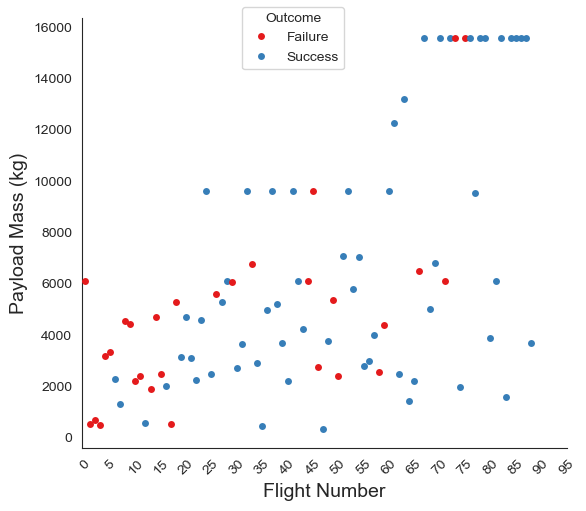

In [5]:
g = sns.catplot(y="Payload_Mass", x="Flight_Number", hue="Class", data=df, aspect=1.16)

# Update hue labels (0: Failure, 1: Success)
g._legend.set_title("Outcome")  # Change the legend title
g._legend.texts[0].set_text("Failure")  # Replace label 0
g._legend.texts[1].set_text("Success")  # Replace label 1
g._legend.set_loc('upper center')
g._legend.draw_frame(True)

# Set axis labels
g.set_axis_labels("Flight Number", "Payload Mass (kg)", fontsize=14)

# Customise x-axis ticks
ax = g.ax
ax.set_xticks(range(0, df["Flight_Number"].max() + 1, 5))
ax.set_xticklabels(range(0, df["Flight_Number"].max() + 1, 5), rotation=45) 

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_flight_number_vs_payload_mass.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

# Display the plot
plt.show()


It has been observed that different launch sites exhibit varying success rates. For instance, the success rate at `CCSFS LC-40` differs from those at `KSC LC-39A` and `VAFB SLC-4E`.  

To analyse these differences further, a detailed visualisation of each site's launch records will be conducted.  

In [6]:
type(g._legend)

matplotlib.legend.Legend

### TASK 1: Visualising the Relationship Between Flight Number and Launch Site  

The function `catplot` will be utilised to create a plot of `Flight_Number` against `Launch_Site`. The following parameters will be set:  
- `x` to `Flight_Number`  
- `y` to `Launch_Site`  
- `hue` to `Class`  

This visualisation will aid in understanding the variation in launch success rates across different sites.  

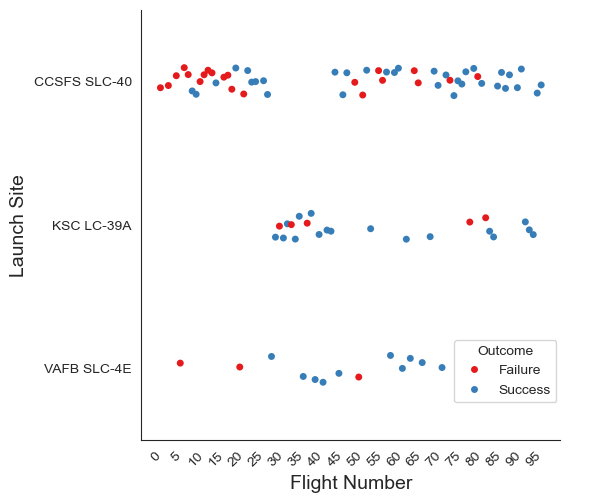

In [7]:
g = sns.catplot(y="Launch_Site", x="Flight_Number", hue="Class", data=df, aspect=1.16)

# Update hue labels (0: Failure, 1: Success)
ax = g.ax
g._legend.set_title("Outcome")  # Change the legend title
g._legend.texts[0].set_text("Failure")  # Replace label 0
g._legend.texts[1].set_text("Success")  # Replace label 1
g._legend.draw_frame(True)
g._legend.set_loc(loc=(.77,.2))


# Customise x-axis ticks

ax.set_xticks(range(0, df["Flight_Number"].max() + 1, 5))
ax.set_xticklabels(range(0, df["Flight_Number"].max() + 1, 5), rotation=45) 


# Set axis labels
g.set_axis_labels("Flight Number", "Launch Site", fontsize=14)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_flight_number_vs_launch_site.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

# Show the plot
plt.show()


The observed patterns in the scatter plots of `Flight_Number` against `Launch_Site` should now be analysed. Identifiable trends, such as variations in launch frequencies and success rates across different sites, should be explained based on the visualised data.  



C:\Users\josue\AppData\Local\Temp\ipykernel_17852\2066155718.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orbit_count = df.groupby(['Launch_Site', 'Orbit']).size().reset_index(name='Count')


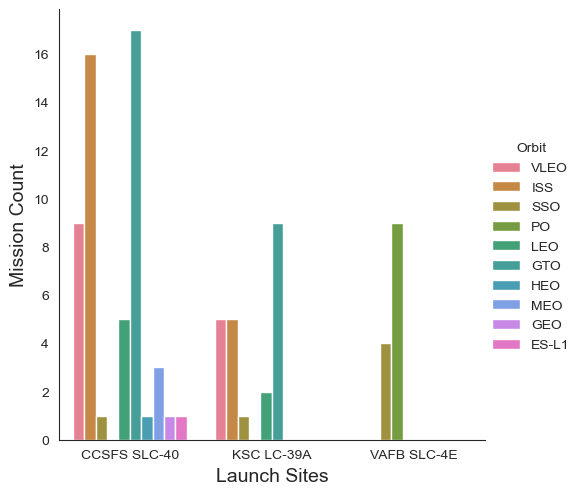

In [8]:
# Create a full grid of all combinations from the categorical levels
full_grid = pd.MultiIndex.from_product(
    [df['Launch_Site'].cat.categories, df['Orbit'].cat.categories],
    names=['Launch_Site', 'Orbit']
).to_frame(index=False)

# Group by Launch_Site and Orbit to count the number of missions
orbit_count = df.groupby(['Launch_Site', 'Orbit']).size().reset_index(name='Count')

# Merge the full grid with the actual counts, filling missing combinations with 0
orbit_count_full = full_grid.merge(orbit_count, on=['Launch_Site', 'Orbit'], how='left').fillna(0)

# Create a barplot with x-axis as Launch_Site and bars grouped by Orbit
g = sns.catplot(kind='bar', x='Launch_Site', y='Count', hue='Orbit', data=orbit_count_full, errorbar='sd')

# Set axis labels
g.set_axis_labels("Launch Sites", "Mission Count", fontsize=14)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_LS_vs_orbit.png")
plt.savefig(fig_path, format="png", dpi=300)

plt.show()



- Polar Orbit (PO) and Sun-Synchronous Orbit (SSO) launches  
  - All **PO** launches and the majority of **SSO** launches are conducted from **Vandenberg Air Force Base (VAFB)**.  
  - **VAFB** is exclusively used for **PO** and **SSO** orbits, with no other types of launches taking place from this site.  

- CCSFS as the Most Utilised Launch Site  
  - **Cape Canaveral Space Force Station (CCSFS)** is the most frequently used launch site among all SpaceX missions.  

- Most Common Orbit Types  
  - The **Geostationary Transfer Orbit (GTO)** is the most commonly targeted orbit.  
  - The **International Space Station (ISS) orbit** is the second most common orbit for launches.  


### TASK 2: Visualise the relationship between Payload and Launch Site


It is also of interest to examine whether there is any relationship between launch sites and their respective payload masses


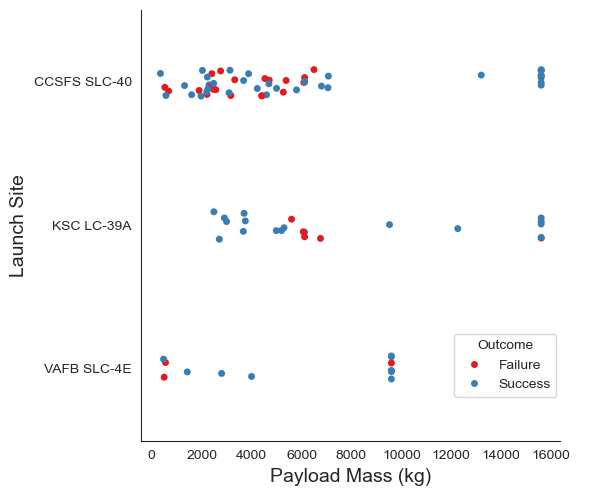

In [9]:
g = sns.catplot(y="Launch_Site", x="Payload_Mass", hue="Class", data=df, aspect=1.16)

# Update hue labels (0: Failure, 1: Success)
g._legend.set_title("Outcome")  # Change the legend title
g._legend.texts[0].set_text("Failure")  # Replace label 0
g._legend.texts[1].set_text("Success")  # Replace label 1
g._legend.draw_frame(True)
g._legend.set_loc(loc=(.77,.2))

# Set axis labels
g.set_axis_labels("Payload Mass (kg)", "Launch Site", fontsize=14)

# Customise x-axis ticks
#ax = g.ax
#ax.set_xticks(range(0, df["Flight_Number"].max() + 1, 5))
#ax.set_xticklabels(range(0, df["Flight_Number"].max() + 1, 5), rotation=45) 

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_flight_number_vs_launch_site.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

# Show the plot
plt.show()

Upon examining the Payload vs. Launch Site scatter plot, it can be observed that no rockets have been launched from the VAFB-SLC site with a heavy payload mass (greater than 10,000 kg).

### TASK 3: Visualise the Relationship Between Success Rate and Orbit Type

Next, the goal is to visually assess whether there is any relationship between the success rate and orbit type.

A `bar chart` will be created to display the success rate for each orbit type.

C:\Users\josue\AppData\Local\Temp\ipykernel_17852\2153242356.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orbit_success_avg = df.groupby('Orbit')['Class'].mean().reset_index()


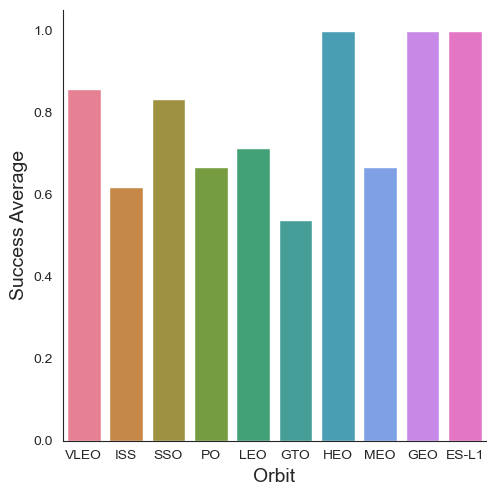

In [10]:
orbit_success_avg = df.groupby('Orbit')['Class'].mean().reset_index()

# Create a barplot 
g = sns.catplot(kind='bar', x='Orbit', y='Class', hue='Orbit', data=orbit_success_avg, errorbar='sd')
#plt.figure(figsize=(6*1.16, 6));

# Set labels
g.set_axis_labels("Orbit", "Success Average", fontsize=14)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_orbit_vs_avg_success.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

# Show the plot
plt.show()

The plotted bar chart will be examined to identify which orbits exhibit the highest success rates.

### TASK 4: Visualise the Relationship Between Flight Number and Orbit Type

For each orbit type, the objective is to investigate whether a relationship exists between `Flight_Number` and the orbit type.

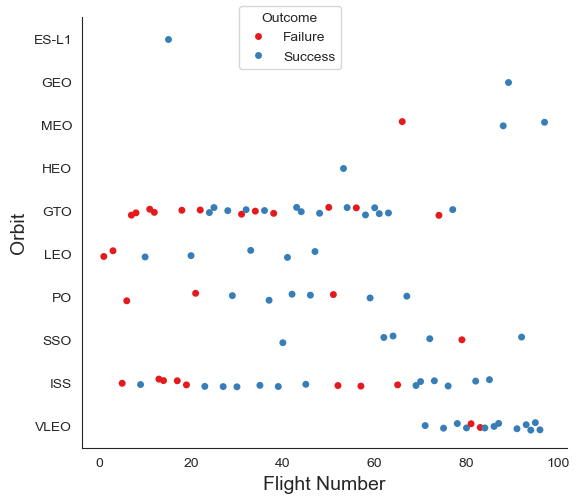

In [11]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x="Flight_Number", y="Orbit", hue="Class", data=df, aspect = 1.16)
g.ax.invert_yaxis()

# Update hue labels (0: Failure, 1: Success)
g._legend.set_title("Outcome")  # Change the legend title
g._legend.texts[0].set_text("Failure")  # Replace label 0
g._legend.texts[1].set_text("Success")  # Replace label 1
g._legend.draw_frame(True)
g._legend.set_loc('upper center')

# Set axis labels
g.set_axis_labels("Flight Number", "Orbit", fontsize=14)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_flight_number_vs_orbit.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

plt.show()

It should be observed that for the LEO orbit, success appears to be related to the number of flights. In contrast, there seems to be no such relationship for the GTO orbit.

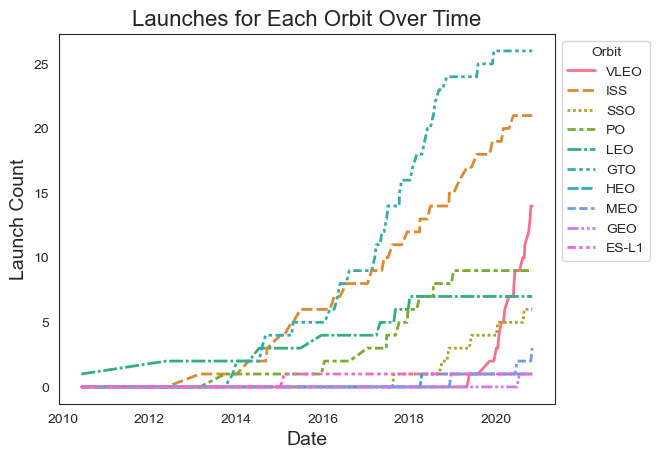

In [12]:
# Ensure Date is in datetime format and sort by it
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by="Date")

# Create a cumulative count for each orbit
df['Cumulative_Count'] = df.groupby("Orbit", observed=True).cumcount() + 1  # Explicitly set observed=True

# Pivot to get a cumulative sum format for plotting
cumulative_df = df.pivot_table(index="Date", columns="Orbit", values="Cumulative_Count", aggfunc='max', observed=True)

# Forward fill missing values to maintain continuity
cumulative_df = cumulative_df.ffill().fillna(0)

# Create figure and axis
fig, ax = plt.subplots()

# Plot the cumulative counts
sns.lineplot(data=cumulative_df, linewidth=2, ax=ax)

# Set axis labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Launch Count", fontsize=14)
ax.set_title("Launches for Each Orbit Over Time", fontsize=16)

# Show legend
ax.legend(title="Orbit", loc="upper left", bbox_to_anchor=(1, 1))

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_orbit_count_vs_time.png")
plt.savefig(fig_path, format="png", dpi=300)


# Show plot
plt.show()


- VLEO  emerged after 2019, with its first recorded launches in 2021, where it became the third most used orbit.  
- LEO  was the first orbit used, but it has remained under 10 launches throughout SpaceX's history.  
- ISS  launches have shown continuous growth since 2012, with an increasing number of missions dedicated to this orbit.  
- GTO  is the most frequently used orbit, with launches beginning in 2013 and experiencing sustained growth.  
- Four orbits have consistently remained below five launches:  
  - ES-L1 (Earth-Sun Lagrange Point L1)  
  - GEO (Geostationary Orbit)  
  - MEO (Medium Earth Orbit)  
  - HEO (Highly Elliptical Orbit)  


### TASK 5: Visualise the Relationship Between Payload and Orbit Type

Similarly, scatter plots of Payload versus Orbit will be created to reveal any potential relationship between Payload and Orbit type.

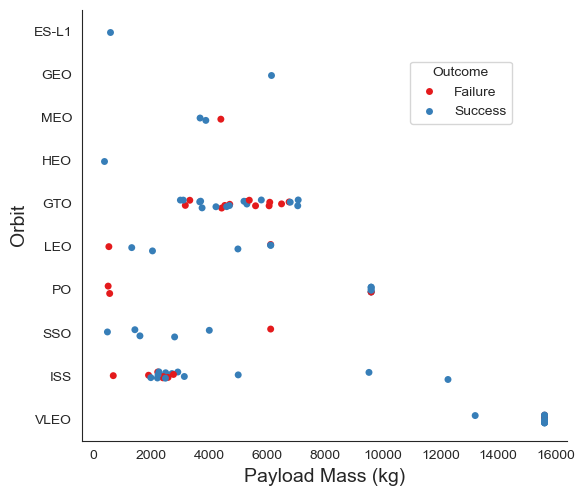

In [13]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
g = sns.catplot(x="Payload_Mass", y="Orbit", hue="Class", data=df, aspect = 1.16)
g.ax.invert_yaxis()

# Update hue labels (0: Failure, 1: Success)
g._legend.set_title("Outcome")  # Change the legend title
g._legend.texts[0].set_text("Failure")  # Replace label 0
g._legend.texts[1].set_text("Success")  # Replace label 1
g._legend.draw_frame(True)
g._legend.set_loc(loc=( 0.7 , 0.75  ))

# Set axis labels
g.set_axis_labels("Payload Mass (kg)", "Orbit", fontsize=14)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_payload_mass_vs_orbit.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

plt.show()

With heavier payloads, the successful landing or positive landing rates are higher for Polar, LEO, and ISS orbits.

However, for the GTO orbit, it is more difficult to distinguish a clear trend, as both successful and unsuccessful landings are observed.

### TASK 6: Visualise the Launch Success Yearly Trend

A line chart can be plotted with the x-axis representing the `Year` and the y-axis showing the average success rate, allowing the trend in launch success over time to be visualised.

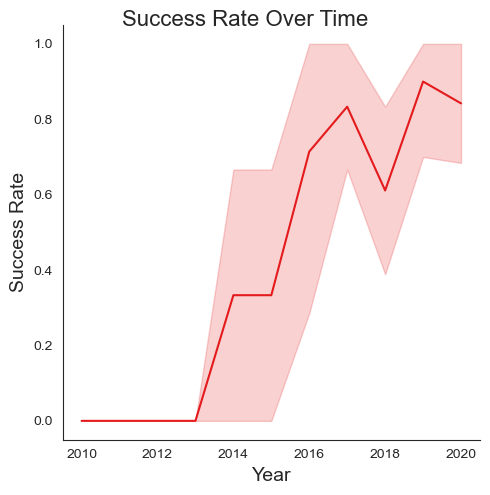

In [14]:
# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Create a line plot using Seaborn
g = sns.relplot(kind='line', data=df, x='Year', y='Class', markers=True)

# Set axis labels and title
g.set_axis_labels("Year", "Success Rate", fontsize=14)
g.fig.suptitle('Success Rate Over Time', fontsize=16)

# Adjust layout for better spacing
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)

# Save the figure as a JPG file
fig_path = os.path.join(FIGURES_DIR, "l5_year_vs_success_rate.jpg")
plt.savefig(fig_path, format="jpg", dpi=300)

# Display the plot
plt.show()


It can be observed that the success rate has steadily increased from 2013 until 2020.


## Features Engineering


By now, some preliminary insights should have been gained regarding how each key variable affects the success rate. In the next module, the features that will be used for success prediction will be selected.

In [15]:
features = df[['Flight_Number', 'Payload_Mass', 'Orbit', 'Launch_Site', 'Flights', 'GridFins', 'Reused', 'Legs', 'Landing_Pad', 'Block', 'Reused_Count', 'Serial']]
features.head()

,Flight_Number,Payload_Mass,Orbit,Launch_Site,Flights,GridFins,Reused,Legs,Landing_Pad,Block,Reused_Count,Serial
0,1,6123.547647,LEO,CCSFS SLC-40,1.0,False,False,False,NaN,1.0,0.0,B0003
2,3,525.000000,LEO,CCSFS SLC-40,1.0,False,False,False,NaN,1.0,0.0,B0005
4,5,677.000000,ISS,CCSFS SLC-40,1.0,False,False,False,NaN,1.0,0.0,B0007
5,6,500.000000,PO,VAFB SLC-4E,1.0,False,False,False,NaN,1.0,0.0,B1003
6,7,3170.000000,GTO,CCSFS SLC-40,1.0,False,False,False,NaN,1.0,0.0,B1004


### TASK 7: Create Dummy Variables for Categorical Columns

The `get_dummies` function will be used to apply OneHotEncoding to the columns `Orbit`, `LaunchSite`, `LandingPad`, and `Serial` in the `features` DataFrame. The result will be assigned to the variable `features_one_hot`, and the first few rows will be displayed using the `head` method. The resulting DataFrame must include all features, including the encoded ones.


In [16]:
# Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'Launch_Site', 'Landing_Pad', 'Serial', 'GridFins', 'Reused', 'Legs']) 
features_one_hot.head()

,Flight_Number,Payload_Mass,Flights,Block,Reused_Count,Orbit_VLEO,Orbit_ISS,Orbit_SSO,Orbit_PO,Orbit_LEO,Orbit_GTO,Orbit_HEO,Orbit_MEO,Orbit_GEO,Orbit_ES-L1,Launch_Site_CCSFS SLC-40,Launch_Site_KSC LC-39A,Launch_Site_VAFB SLC-4E,Landing_Pad_5e9e3032383ecb267a34e7c7,Landing_Pad_5e9e3032383ecb554034e7c9,Landing_Pad_5e9e3032383ecb6bb234e7ca,Landing_Pad_5e9e3032383ecb761634e7cb,Landing_Pad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6123.547647,1.0,1.0,0.0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
2,3,525.000000,1.0,1.0,0.0,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
4,5,677.000000,1.0,1.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
5,6,500.000000,1.0,1.0,0.0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
6,7,3170.000000,1.0,1.0,0.0,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False


### TASK  8: Cast all numeric columns to `float64`


Now that the `features_one_hot` DataFrame contains only numerical values, the entire DataFrame will be cast to the `float64` data type.

In [17]:
features_one_hot=features_one_hot.astype('float64')
features_one_hot.head()

,Flight_Number,Payload_Mass,Flights,Block,Reused_Count,Orbit_VLEO,Orbit_ISS,Orbit_SSO,Orbit_PO,Orbit_LEO,Orbit_GTO,Orbit_HEO,Orbit_MEO,Orbit_GEO,Orbit_ES-L1,Launch_Site_CCSFS SLC-40,Launch_Site_KSC LC-39A,Launch_Site_VAFB SLC-4E,Landing_Pad_5e9e3032383ecb267a34e7c7,Landing_Pad_5e9e3032383ecb554034e7c9,Landing_Pad_5e9e3032383ecb6bb234e7ca,Landing_Pad_5e9e3032383ecb761634e7cb,Landing_Pad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6123.547647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,677.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,3170.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


The `features_one_hot` DataFrame can now be exported to **CSV**, **pickle**, and **json** files for the next section. 

In [18]:
# save as CSV file 
csv_file = os.path.join(INTERIM_DATA_DIR, "dataset_part_3.csv")
features_one_hot.to_csv(csv_file, index=False)

# save as JSON file
json_file = os.path.join(INTERIM_DATA_DIR, "dataset_part_3.json")
features_one_hot.to_json(json_file, orient='records', lines=True)

# save as Pickle file
pickle_file= os.path.join(INTERIM_DATA_DIR, 'dataset_part_3.pkl')
features_one_hot.to_pickle(pickle_file)


Copyright © 2020 IBM Corporation. All rights reserved.
